In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
resume = pd.read_csv('UpdatedResumeDataSet.csv')
resume.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
resume['CleanedResume'] = ''

In [4]:
resume.head()

,Category,Resume,CleanedResume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [5]:
print("Categories of Resume present")
resume['Category'].unique()

Categories of Resume present


array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [6]:
print('Value counts for each category of Resume')
resume['Category'].value_counts()

Value counts for each category of Resume


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
Blockchain                   40
Mechanical Engineer          40
Operations Manager           40
ETL Developer                40
Sales                        40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

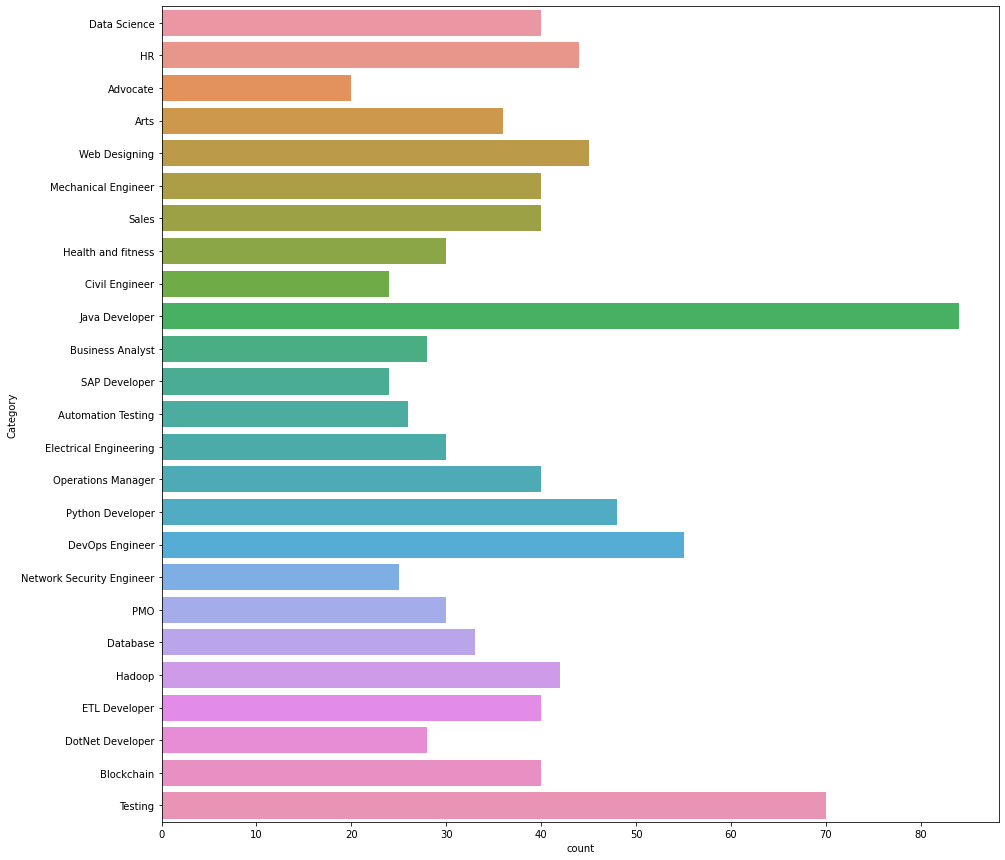

In [9]:
## Visualizing count for resume categories
import seaborn as sns
plt.figure(figsize=(15,15))
sns.countplot(y="Category", data=resume)

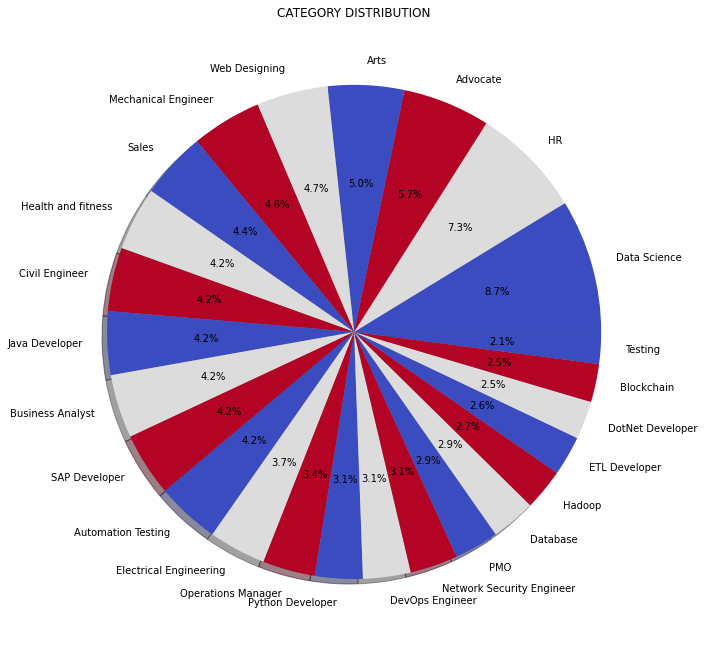

In [12]:
## Visualizing distribution of categories

from matplotlib.gridspec import GridSpec

target_counts = resume['Category'].value_counts()
target_labels = resume["Category"].unique()

##Make square figure and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2,2)

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(target_counts, labels=target_labels, colors=colors, autopct='%1.1f%%', shadow=True)

In [13]:
## Cleaning the text data

import re
def CleanResume(resumeText):
    #Remove URL
    resumeText = re.sub('http\S+\s*', ' ', resumeText)
    #Remove RT and CC
    resumeText = re.sub('RT|cc', ' ', resumeText)
    #Remove Hashtags
    resumeText = re.sub('#\S+', '', resumeText)
    #Remove mentions
    resumeText = re.sub('@\S+', ' ', resumeText)
    #Remove Punctuations
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)
    #Replace Non-Ascii character with space
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    #Remove Extra White Space
    resumeText = re.sub('\s+', ' ', resumeText)
   
    return resumeText

resume['CleanedResume'] = resume.Resume.apply(lambda x: CleanResume(x))

In [14]:
resume.head()

,Category,Resume,CleanedResume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [86]:
## Creating Word Cloud

import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords = []
Sentences = resume['Resume'].values
cleanedSentences = ""

for i in range(0, 160):
    cleanedText = CleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordFreqDist = nltk.FreqDist(totalWords)
mostcommon = wordFreqDist.most_common(50)
mostcommon

[('Details', 484),
 ('Exprience', 446),
 ('months', 376),
 ('company', 330),
 ('description', 310),
 ('1', 290),
 ('year', 232),
 ('January', 216),
 ('Less', 204),
 ('Data', 200),
 ('data', 192),
 ('Skill', 166),
 ('Maharashtra', 166),
 ('6', 164),
 ('Python', 156),
 ('Science', 154),
 ('I', 146),
 ('Education', 142),
 ('College', 140),
 ('The', 126),
 ('project', 126),
 ('like', 126),
 ('Project', 124),
 ('Learning', 116),
 ('India', 114),
 ('Machine', 112),
 ('University', 112),
 ('Web', 106),
 ('using', 104),
 ('monthsCompany', 102),
 ('B', 98),
 ('C', 98),
 ('SQL', 96),
 ('time', 92),
 ('learning', 90),
 ('Mumbai', 90),
 ('Pune', 90),
 ('Arts', 90),
 ('A', 84),
 ('application', 84),
 ('Engineering', 78),
 ('24', 76),
 ('various', 76),
 ('Software', 76),
 ('Responsibilities', 76),
 ('Nagpur', 76),
 ('development', 74),
 ('Management', 74),
 ('projects', 74),
 ('Technologies', 72)]

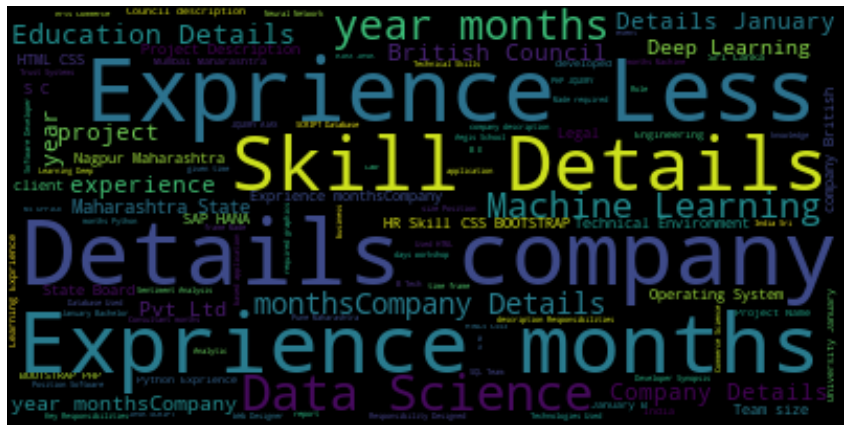

In [94]:
## Generating Word Cloud
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [102]:
## Converting these words into Categorical values

from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()

for i in var_mod:
    resume[i] = le.fit_transform(resume[i])

In [103]:
resume.head()

,Category,Resume,CleanedResume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [112]:
## Training Machine learning model for Resume Screening

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resume['CleanedResume'].values
requiredTarget = resume['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True,
                                 stop_words='english',
                                 max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print('Features Completed...')

X_train, X_test, y_train, y_test = train_test_split(WordFeatures, 
                                                    requiredTarget, 
                                                    random_state=0, 
                                                    test_size=0.2)

print(X_train.shape)
print(X_test.shape)

Features Completed...
(769, 1500)
(193, 1500)


In [115]:
## Training the model

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)

prediction = clf.predict(X_test)

In [120]:
## Metrics

print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print('\n\n--------------CLASSIFICATION REPORT---------------------------\n\nClassification report for classifier %s:\n%s\n' %(clf , classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99


--------------CLASSIFICATION REPORT---------------------------

Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.